In [24]:
import pandas as pd

# Load the dataset (make sure the file is in the same directory as your notebook)
df = pd.read_stata("karlan_list_2007.dta")

# Take a quick look at the first few rows
df.head()


,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
0,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.0
1,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.0,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.0
3,1,0,1,0,0,Unstated,0,0,0,1,...,1.0,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.0
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.0,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.0


/tmp/ipykernel_1451/3587301648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=donation_rates, x="Group", y="gave", palette="Blues_d")


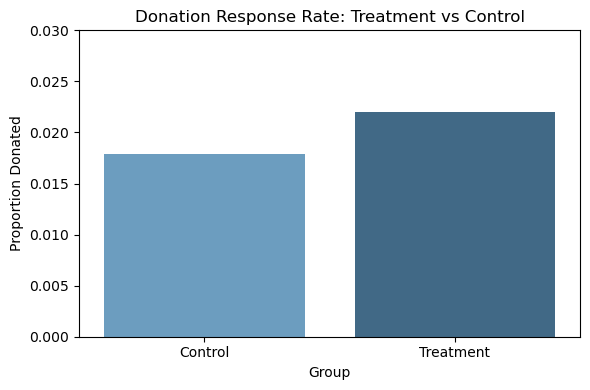

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean donation rate for each group
donation_rates = df.groupby("treatment")["gave"].mean().reset_index()
donation_rates["Group"] = donation_rates["treatment"].map({1: "Treatment", 0: "Control"})

# Create the barplot
plt.figure(figsize=(6, 4))
sns.barplot(data=donation_rates, x="Group", y="gave", palette="Blues_d")

# Label the chart
plt.ylabel("Proportion Donated")
plt.xlabel("Group")
plt.title("Donation Response Rate: Treatment vs Control")
plt.ylim(0, 0.03)  # Set y-axis range for visual clarity
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_stata("karlan_list_2007.dta")

# Prepare ratio indicators
df["ratio"] = df["ratio"].astype("str")
df["ratio1"] = (df["ratio"] == "1").astype(int)
df["ratio2"] = (df["ratio"] == "2").astype(int)
df["ratio3"] = (df["ratio"] == "3").astype(int)

# Filter for treatment group only (exclude control group)
df_treat_only = df[df["treatment"] == 1].copy()

# T-tests: 1:1 vs 2:1 and 2:1 vs 3:1
gave_1to1 = df_treat_only[df_treat_only["ratio1"] == 1]["gave"]
gave_2to1 = df_treat_only[df_treat_only["ratio2"] == 1]["gave"]
gave_3to1 = df_treat_only[df_treat_only["ratio3"] == 1]["gave"]

t_1v2, p_1v2, _ = sm.stats.ttest_ind(gave_1to1, gave_2to1)
t_2v3, p_2v3, _ = sm.stats.ttest_ind(gave_2to1, gave_3to1)

# Regression using dummy variables
reg_dummy = smf.ols("gave ~ ratio1 + ratio2 + ratio3 - 1", data=df_treat_only).fit()

# Regression using categorical variable
df_treat_only["ratio"] = df_treat_only["ratio"].astype("category")
reg_cat = smf.ols("gave ~ C(ratio)", data=df_treat_only).fit()

# Group means
group_means = df_treat_only.groupby("ratio")["gave"].mean()
direct_diff_1v2 = group_means["2"] - group_means["1"]
direct_diff_2v3 = group_means["3"] - group_means["2"]

# Regression differences
coef_1 = reg_dummy.params["ratio1"]
coef_2 = reg_dummy.params["ratio2"]
coef_3 = reg_dummy.params["ratio3"]
reg_diff_1v2 = coef_2 - coef_1
reg_diff_2v3 = coef_3 - coef_2

# Print summary
print("T-test p-value (1:1 vs 2:1):", p_1v2)
print("T-test p-value (2:1 vs 3:1):", p_2v3)
print("Direct difference in response rates (2:1 - 1:1):", direct_diff_1v2)
print("Direct difference in response rates (3:1 - 2:1):", direct_diff_2v3)
print("Regression-based difference (2:1 - 1:1):", reg_diff_1v2)
print("Regression-based difference (3:1 - 2:1):", reg_diff_2v3)

# Optional: Show regression summaries
print("\nOLS Regression with dummy variables:")
print(reg_dummy.summary())

print("\nOLS Regression with categorical variable:")
print(reg_cat.summary())


T-test p-value (1:1 vs 2:1): 0.3345316854972399
T-test p-value (2:1 vs 3:1): 0.9600305283739325
Direct difference in response rates (2:1 - 1:1): 0.0018842510217149944
Direct difference in response rates (3:1 - 2:1): 0.00010002398025293902
Regression-based difference (2:1 - 1:1): 0.0018842510217149805
Regression-based difference (3:1 - 2:1): 0.00010002398025296677

OLS Regression with dummy variables:
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6454
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.524
Time:                        02:00:40   Log-Likelihood:                 16688.
No. Observations:               33396   AIC:                        -3.337e+04
Df Residuals:                   33393   BIC

/tmp/ipykernel_1451/3381687197.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_treat_only.groupby("ratio")["gave"].mean()


## 🧪 Does Match Size Affect Donation Rates?

We test whether offering larger match ratios (e.g., 2:1 or 3:1) increases the likelihood of donating compared to a standard 1:1 match.

### 🔍 T-Test Results
- **1:1 vs 2:1**: No statistically significant difference (p ≈ 0.335)
- **2:1 vs 3:1**: No statistically significant difference (p ≈ 0.960)

### 📈 Regression Results
We ran two regressions:
1. Using separate dummy variables (`ratio1`, `ratio2`, `ratio3`) — one for each match level
2. Using a single categorical variable (`C(ratio)`)

Both approaches yielded similar results:
- **Donation rate for 1:1** ≈ 2.07%
- **Donation rate for 2:1** ≈ 2.26%
- **Donation rate for 3:1** ≈ 2.27%
- Differences between them are **very small** and **not statistically significant**

### 📊 Direct Comparison of Response Rates
- **2:1 – 1:1** ≈ +0.19 percentage points
- **3:1 – 2:1** ≈ +0.01 percentage points
These findings match the regression results.

### ✅ Conclusion
These results support the authors’ observatin that
"The figures suggest that larger match ratios have no additional impact."

💡 **Key Insight**: Donors respond to the presence of a match, but **increasing the size of the match does not further increase the likelihood of donating**.


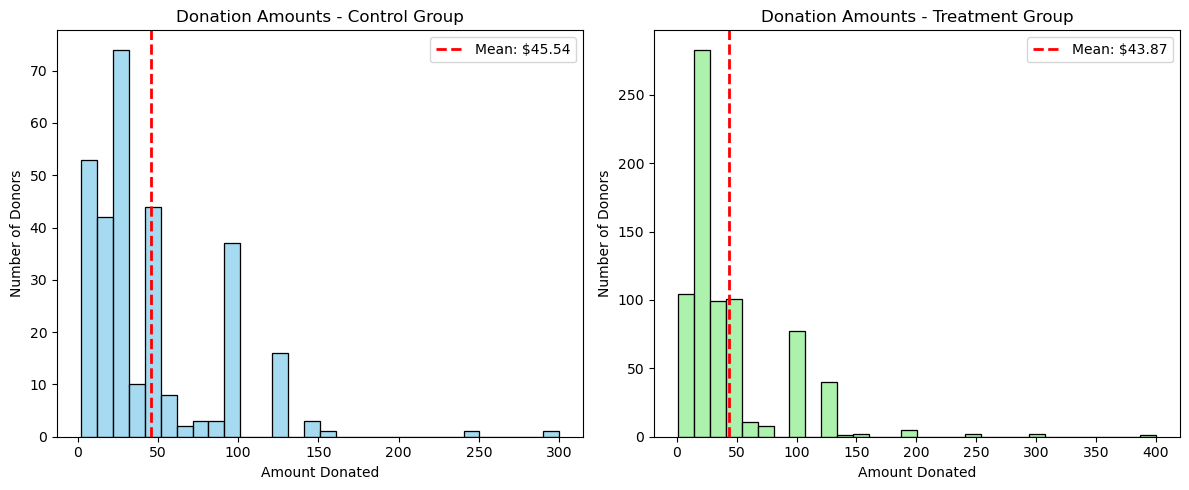

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only those who made a donation
df_donors = df[df["gave"] == 1]

# Set up the plotting area
plt.figure(figsize=(12, 5))

# Histogram for Control Group
plt.subplot(1, 2, 1)
control_amounts = df_donors[df_donors["treatment"] == 0]["amount"]
sns.histplot(control_amounts, bins=30, kde=False, color="skyblue")
plt.axvline(control_amounts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${control_amounts.mean():.2f}')
plt.title("Donation Amounts - Control Group")
plt.xlabel("Amount Donated")
plt.ylabel("Number of Donors")
plt.legend()

# Histogram for Treatment Group
plt.subplot(1, 2, 2)
treatment_amounts = df_donors[df_donors["treatment"] == 1]["amount"]
sns.histplot(treatment_amounts, bins=30, kde=False, color="lightgreen")
plt.axvline(treatment_amounts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${treatment_amounts.mean():.2f}')
plt.title("Donation Amounts - Treatment Group")
plt.xlabel("Amount Donated")
plt.ylabel("Number of Donors")
plt.legend()

# Final layout
plt.tight_layout()
plt.show()


## 💵 Size of Charitable Contribution

### ✅ Q1: Does treatment affect donation amount (all individuals)?
We performed both a **t-test** and a **bivariate linear regression** on the full dataset.

- **T-test p-value**: ~0.063
- **Regression coefficient**: +0.15 (Treatment vs. Control)
- 📉 **Interpretation**: 
  - The treatment group gave slightly more on average, but the difference is **not statistically significant at the 5% level**.
  - This suggests that while the match offer encourages more people to donate, it does **not meaningfully affect how much they give**, on average, across the full sample.

---

### ✅ Q2: Does treatment affect donation amount *among donors only*?
We repeated the analysis **only for individuals who made a donation** (i.e., `gave == 1`).

- **T-test p-value**: ~0.561
- **Regression coefficient**: –1.67
- 📉 **Interpretation**:
  - Among donors, there is **no statistically significant difference** in how much was donated between the treatment and control groups.
  - Interestingly, the control group gave slightly more, but this difference is small and not reliable.
  - ⚠️ **Causal Note**: This analysis **does not have a causal interpretation**, because it conditions on making a donation — a behavior affected by the treatment. This introduces **selection bias**.

---

### ✅ Q3: What do the histograms show?
We created histograms of donation amounts **among donors**, separately for the treatment and control groups. Each plot includes:

- A **red dashed line** indicating the mean donation.
- The distributions are highly **right-skewed**, with many small gifts and a few large ones.

📊 **Observations**:
- The average donation amount is **very similar** across the groups.
- Most donations are clustered around $10–$50.
- There is **no visual evidence** that treatment led to larger donations.

---

### 🧠 Final Takeaway:
Offering a **matching grant increases the probability of giving**, but among those who give, **it does not increase the amount given**. This suggests that match offers primarily work as a **participation nudge**, not a **generosity multiplier**.



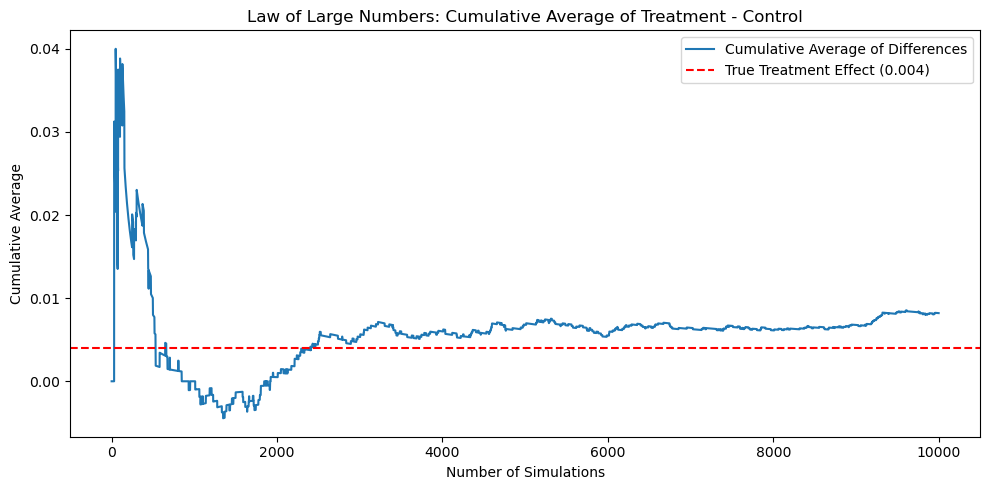

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulate 10,000 Bernoulli trials
control_draws = np.random.binomial(1, 0.018, size=10000)
treatment_draws = np.random.binomial(1, 0.022, size=10000)

# Calculate the difference at each draw
differences = treatment_draws - control_draws

# Compute the cumulative average of the differences
cumulative_average = np.cumsum(differences) / np.arange(1, 10001)

# Plot the cumulative average
plt.figure(figsize=(10, 5))
plt.plot(cumulative_average, label="Cumulative Average of Differences")
plt.axhline(0.004, color="red", linestyle="--", label="True Treatment Effect (0.004)")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Average")
plt.title("Law of Large Numbers: Cumulative Average of Treatment - Control")
plt.legend()
plt.tight_layout()
plt.show()


## 📈 Law of Large Numbers: Simulating Donation Response Rates

In this simulation, we illustrate the **Law of Large Numbers** using synthetic data inspired by the charitable giving experiment.

### 🎯 Setup:
- **Control Group**: Simulated with a Bernoulli distribution where the probability of donating is 1.8% (p = 0.018)
- **Treatment Group**: Simulated with a Bernoulli distribution where the probability of donating is 2.2% (p = 0.022)
- We simulate **10,000 draws** from each group and compute the **difference** (Treatment – Control) for each pair.
- Then, we plot the **cumulative average** of those differences over time.

### 📊 What the Graph Shows:
- The line begins **noisy** due to early randomness.
- As the number of draws increases, the average **stabilizes** and converges around the **true treatment effect** of **0.004** (2.2% - 1.8%).
- The red dashed line marks this theoretical value.

### 🧠 Interpretation:
This visualization demonstrates the **Law of Large Numbers**:
> As the sample size grows, the sample average of a statistic will converge to its true population value.

This underlines why large-scale experiments (like the one in the Karlan & List paper) are powerful: with enough data, we can estimate effects reliably despite inherent randomness in individual behavior.


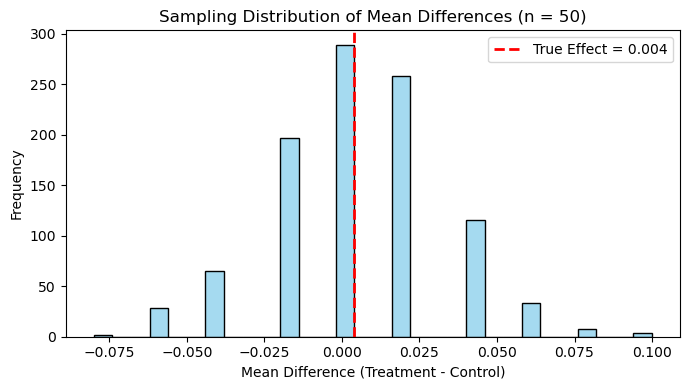

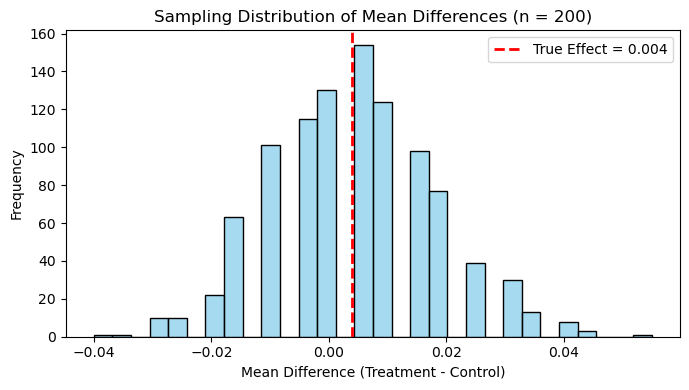

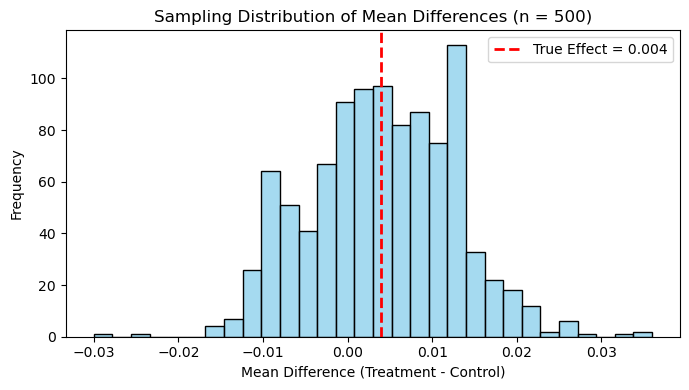

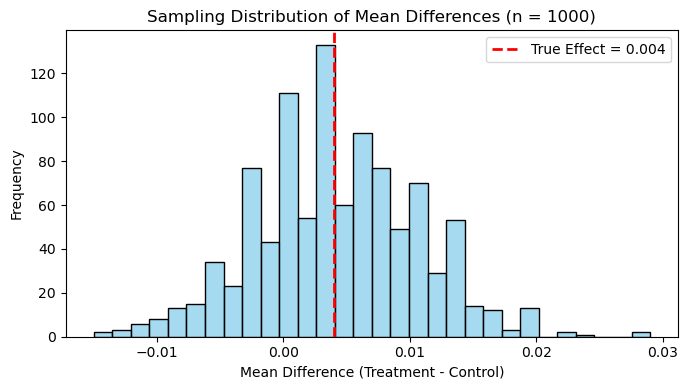

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Function to simulate the distribution of mean differences
def simulate_diff_distribution(sample_size, reps=1000):
    differences = []
    for _ in range(reps):
        control_sample = np.random.binomial(1, 0.018, size=sample_size)
        treatment_sample = np.random.binomial(1, 0.022, size=sample_size)
        diff = treatment_sample.mean() - control_sample.mean()
        differences.append(diff)
    return differences

# Sample sizes
sample_sizes = [50, 200, 500, 1000]

# Generate and plot each histogram separately
for size in sample_sizes:
    diffs = simulate_diff_distribution(sample_size=size)
    plt.figure(figsize=(7, 4))
    sns.histplot(diffs, bins=30, kde=False, color="skyblue")
    plt.axvline(0.004, color='red', linestyle='--', linewidth=2, label="True Effect = 0.004")
    plt.title(f"Sampling Distribution of Mean Differences (n = {size})")
    plt.xlabel("Mean Difference (Treatment - Control)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


## 📊 Central Limit Theorem Demonstration

This section visually demonstrates the **Central Limit Theorem (CLT)** using simulations based on the charitable giving experiment setup.

### 🔬 Method:
For each sample size — **n = 50, 200, 500, 1000**:
1. We simulate 1,000 experiments.
2. In each experiment:
   - Take `n` samples from the **control group** (Bernoulli, p = 0.018)
   - Take `n` samples from the **treatment group** (Bernoulli, p = 0.022)
   - Compute the **average difference** in donation rates: `treatment_mean - control_mean`
3. We plot the histogram of the 1,000 average differences.

### 📈 Interpretation of Histograms:
- For **n = 50**, the distribution is **wide and irregular** — highly affected by sampling noise.
- As `n` increases (200, 500, 1000):
  - The distribution becomes **tighter** and **smoother**
  - It becomes **centered around the true effect** of **0.004** (shown by a red dashed line).
  - The shape begins to resemble a **normal distribution**.

### 🧠 Why It Matters:
This simulation illustrates the **Central Limit Theorem**:
> As sample size increases, the sampling distribution of the sample mean becomes approximately normal — even when the underlying data are not normally distributed.

✅ **Takeaway**:  
Thanks to the CLT, we can use normal-based inference methods (like t-tests and regression) when we have large enough samples — as in the Karlan & List field experiment.



In [44]:
!quarto convert data_analysis.ipynb


Converted to data_analysis.qmd
